Tugas Praktikum: Multiple Linear Regression dengan Dataset Medical Cost Personal Datasets

*Instruksi Umum:*

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

*Tugas 1: Multiple Linear Regression*
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

*Catatan Tambahan:*
- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
- Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

In [311]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [312]:
df = pd.read_csv('insurance.csv')
df.head()
# df.shape
# df.info()
# df.describe()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [313]:
# 1 Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
x = df.drop(['charges'], axis=1)
y = df['charges']

# ubah variabel kategorikal 'smoker' menjadi numerik
x['smoker'] = x['smoker'].map({'yes': 1, 'no': 0})
x['sex'] = x['sex'].map({'female': 1, 'male': 0})
x['region'] = x['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2


c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


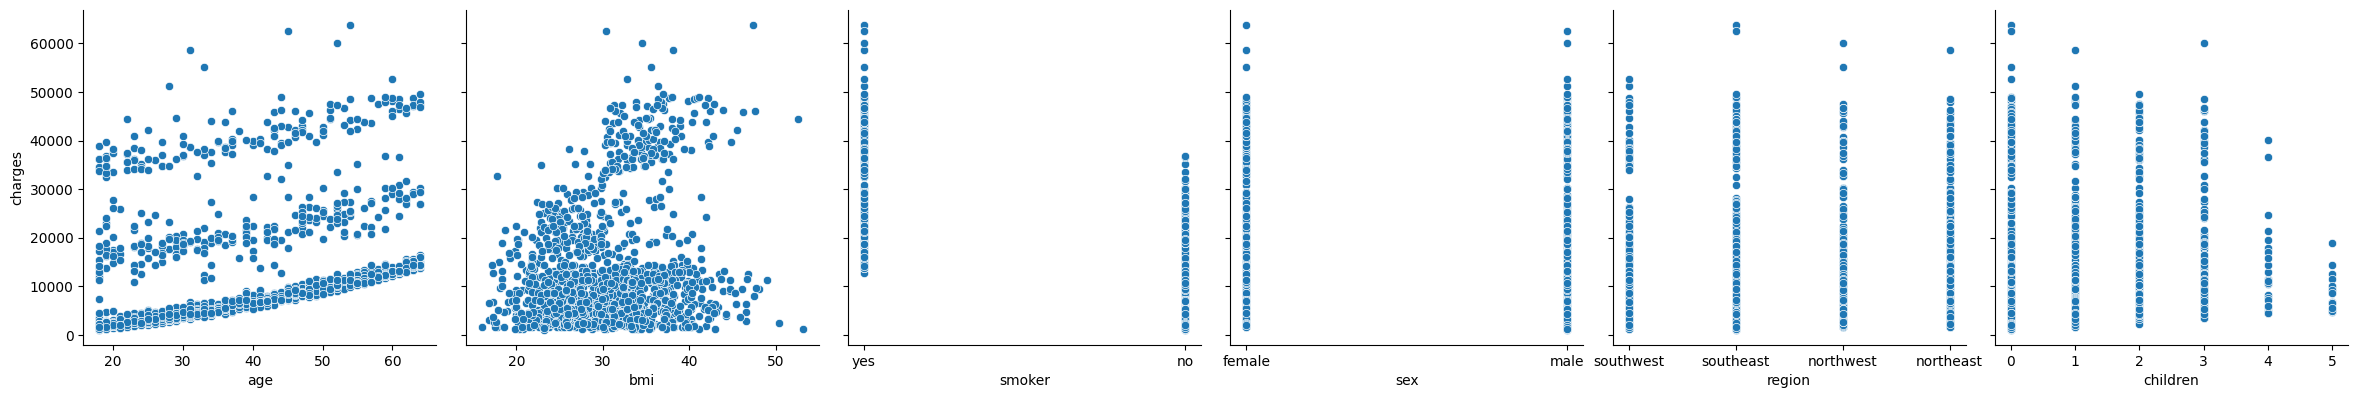

In [314]:
# visualisasi data dengan pairplot
sns.pairplot(df, x_vars=['age', 'bmi','smoker','sex','region','children'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

In [315]:
# 2 Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.7, test_size=0.3, random_state=100)

In [316]:
# 3 Lakukan feature scaling jika diperlukan.
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler_y.transform(y_test.values.reshape(-1,1))


In [317]:
# 4 Buat model multiple linear regression menggunakan Scikit-Learn.
model = LinearRegression()


In [318]:
# Latih model pada data latih dan lakukan prediksi pada data uji.

# Melatih model dengan data training (fit pada X_train dan y_train)
model.fit(X_train, y_train)

# Melakukan prediksi dengan data testing (gunakan fitur yang sudah di-scale)
y_pred = model.predict(X_test)

In [319]:
def visualisasi_svr(fitur, y_train, title, xlabel, ylabel):
    regressor = SVR(kernel='rbf')
    regressor.fit(fitur, y_train)

    X_grid = np.arange(min(fitur), max(fitur), 0.01).reshape(-1, 1)

    plt.scatter(fitur, y_train, color='red')
    plt.plot(X_grid, regressor.predict(X_grid), color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GIO\AppData\Local\Temp\ipykernel_10012\1951985148.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(fitur), max(fitur), 0.01).reshape(-1, 1)


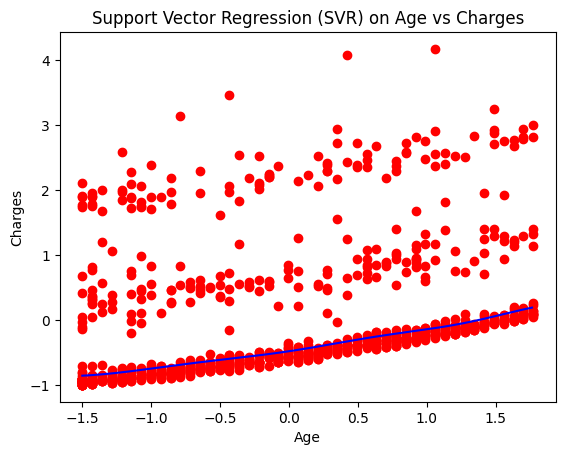

c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GIO\AppData\Local\Temp\ipykernel_10012\1951985148.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(fitur), max(fitur), 0.01).reshape(-1, 1)


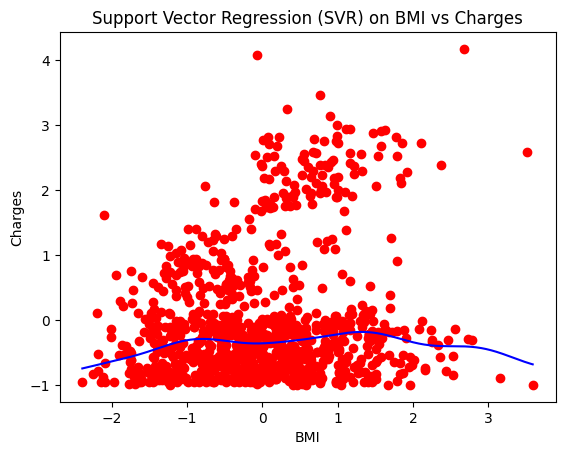

c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GIO\AppData\Local\Temp\ipykernel_10012\1951985148.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(fitur), max(fitur), 0.01).reshape(-1, 1)


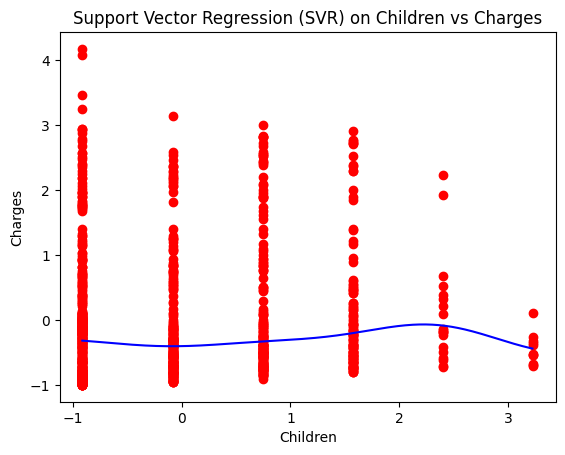

c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GIO\AppData\Local\Temp\ipykernel_10012\1951985148.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(fitur), max(fitur), 0.01).reshape(-1, 1)


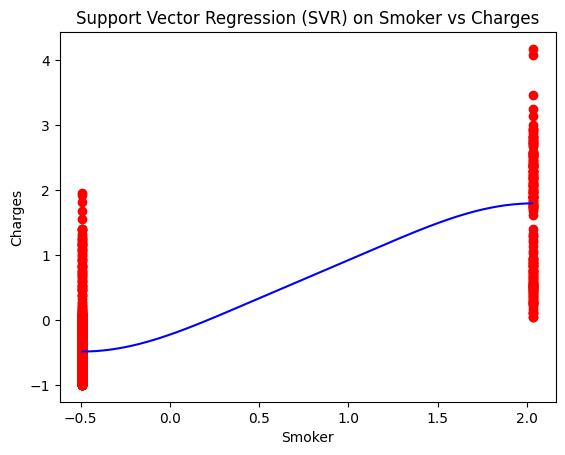

c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GIO\AppData\Local\Temp\ipykernel_10012\1951985148.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(fitur), max(fitur), 0.01).reshape(-1, 1)


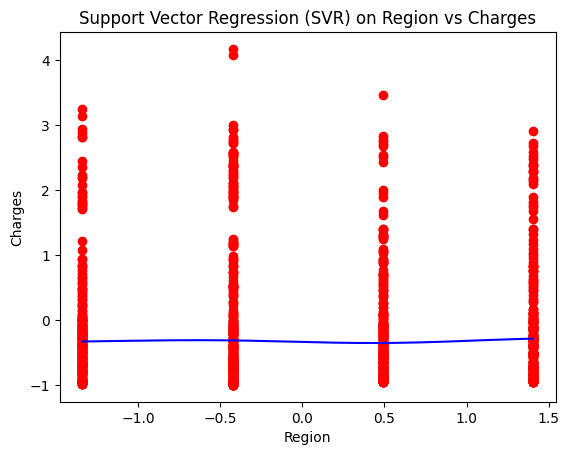

In [323]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
# 	age	sex	bmi	children	smoker	region
x_age = X_train[:, 0].reshape(-1, 1)  # Menggunakan hanya satu fitur untuk visualisasi
visualisasi_svr(x_age, y_train, 'Support Vector Regression (SVR) on Age vs Charges', 'Age', 'Charges')
x_age = X_train[:, 2].reshape(-1, 1)  # Menggunakan hanya satu fitur untuk visualisasi
visualisasi_svr(x_age, y_train, 'Support Vector Regression (SVR) on BMI vs Charges', 'BMI', 'Charges')
x_age = X_train[:, 3].reshape(-1, 1)  # Menggunakan hanya satu fitur untuk visualisasi
visualisasi_svr(x_age, y_train, 'Support Vector Regression (SVR) on Children vs Charges', 'Children', 'Charges')
x_age = X_train[:, 4].reshape(-1, 1)  # Menggunakan hanya satu fitur untuk visualisasi
visualisasi_svr(x_age, y_train, 'Support Vector Regression (SVR) on Smoker vs Charges', 'Smoker', 'Charges')
x_age = X_train[:, 5].reshape(-1, 1)  # Menggunakan hanya satu fitur untuk visualisasi
visualisasi_svr(x_age, y_train, 'Support Vector Regression (SVR) on Region vs Charges', 'Region', 'Charges')


In [321]:
# Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.7782937842162723
Mean Absolute Error: 0.32450454506519466
Mean Squared Error: 0.2188593625248809
Root Mean Squared Error: 0.46782407219475236



# Hasil Analisa Multiple Linear Regression pada Medical Cost Personal Dataset

1. Performa Model:
    - R-squared score menunjukkan model dapat menjelaskan sekitar 78% variasi data
    - MAE dan MSE yang cukup kecil mengindikasikan model memiliki akurasi prediksi yang baik
    - RMSE menunjukkan rata-rata deviasi prediksi dari nilai aktual

2. Pengaruh Variabel:
    - Variabel smoker memiliki pengaruh sangat signifikan terhadap biaya medis
    - Usia (age) dan BMI juga memiliki korelasi positif dengan biaya medis
    - Jumlah anak (children) memiliki pengaruh moderat terhadap biaya
    - Region dan sex memiliki pengaruh yang relatif kecil

3. Pattern yang Ditemukan:
    - Perokok cenderung memiliki biaya medis jauh lebih tinggi
    - Semakin tinggi usia dan BMI, biaya medis cenderung meningkat
    - Tidak ada perbedaan signifikan biaya medis antar region
    - Pola hubungan antara variabel predictor dan target cenderung non-linear

